In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0MB 24.5MB/s 
     |████████████████████████████████| 15.3MB 253kB/s 
     |████████████████████████████████| 6.5MB 45.5MB/s 


In [ ]:
pip install -U pandas

     |████████████████████████████████| 9.9MB 12.6MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [ ]:
pip install plotly==4.6

     |████████████████████████████████| 7.2MB 13.2MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

# check
import plotly.offline as pyo

import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#check end

from plotly.subplots import make_subplots
import plotly.express as px

import geopandas as gpd
import json
import shapely
import folium
init_notebook_mode(connected = True)

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

Update the below path to the path of the cleaned dataset found under Big-Data-Project\datasets\Cleaned Data and use the NYPD_Shooting_Incident__Historic_Cleaned.csv file.

In [ ]:
shootings = pd.read_csv('/content/sample_data/NYPD_Shooting_Incident__Historic_Cleaned.csv')
# Shape
shootings.shape

(17025, 20)

Update the below path to the path of the json file found under Big-Data-Project\datasets\Cleaned Data and use the nyc-boroughs.geojson file.

In [ ]:
 json_file_path = "../content/sample_data/nyc-boroughs.geojson"

with open(json_file_path, 'r') as j:
     precincts = json.loads(j.read())

In [ ]:
shootings['date'] = pd.to_datetime(shootings['OCCUR_DATE'])
shootings['year'] = shootings['date'].dt.year
shootings['month'] = shootings['date'].dt.month
shootings['month_str'] = shootings['date'].dt.month_name()
shootings['day'] = shootings['date'].dt.day
shootings['weekdays'] = shootings['date'].dt.strftime('%A')  
shootings['hour'] = shootings['OCCUR_TIME'].apply(lambda date : int(date.split(':')[0]))

In [ ]:
shootings.head()

,Unnamed: 0,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,date,year,month,month_str,day,weekdays,hour
0,0,201575314,08/23/2019,22:10:00,QUEENS,103,0.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK HISPANIC,25-44,M,BLACK,1037451,193561,40.697805,-73.808141,POINT (-73.80814071699996 40.697805308000056),2019-08-23,2019,8,August,23,Friday,22
1,1,205748546,11/27/2019,15:54:00,BRONX,40,0.0,GROCERY/BODEGA,False,<18,M,BLACK,25-44,F,BLACK,1006789,237559,40.818700,-73.918571,POINT (-73.91857061799993 40.81869973000005),2019-11-27,2019,11,November,27,Wednesday,15
2,2,193118596,02/02/2019,19:40:00,MANHATTAN,23,0.0,MULTI DWELL - APT BUILD,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,999347,227795,40.791916,-73.945480,POINT (-73.94547965999999 40.791916091000076),2019-02-02,2019,2,February,2,Saturday,19
3,3,204192600,10/24/2019,00:52:00,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,938149,171781,40.638064,-74.166108,POINT (-74.16610830199996 40.63806398200006),2019-10-24,2019,10,October,24,Thursday,0
4,4,201483468,08/22/2019,18:03:00,BRONX,46,0.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,1008224,250621,40.854547,-73.913339,POINT (-73.91333944399999 40.85454734900003),2019-08-22,2019,8,August,22,Thursday,18


In [ ]:
shootings.isna().sum()

Unnamed: 0                 0
INCIDENT_KEY               0
OCCUR_DATE                 0
OCCUR_TIME                 0
BORO                       0
PRECINCT                   0
JURISDICTION_CODE          0
LOCATION_DESC              0
STATISTICAL_MURDER_FLAG    0
PERP_AGE_GROUP             0
PERP_SEX                   0
PERP_RACE                  0
VIC_AGE_GROUP              0
VIC_SEX                    0
VIC_RACE                   0
X_COORD_CD                 0
Y_COORD_CD                 0
Latitude                   0
Longitude                  0
Lon_Lat                    0
date                       0
year                       0
month                      0
month_str                  0
day                        0
weekdays                   0
hour                       0
dtype: int64

In [ ]:
monthly_df=shootings['date'].groupby(shootings.date.dt.to_period("M")).agg('count').to_frame(name="count").reset_index()
monthly_df['fatal shootings'] = shootings.groupby(shootings.date.dt.to_period("M")).agg('sum').reset_index()['STATISTICAL_MURDER_FLAG']
month_year=[]
for i in monthly_df['date']:
    month_year.append(str(i))

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x= month_year,
    y= monthly_df['count'],
    name="Monthly Shootings",
    mode='lines'))
fig.add_trace(go.Scatter(
    x= month_year,
    y= monthly_df['fatal shootings'],
    name="Monthly Fatal Shootings",
    mode='lines'))

fig.update_layout(title='Shooting Incidents in New York (2006-2019)') 
fig.update_xaxes(title_text="Time", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text="Number of Shootings", showline=True, linewidth=2, linecolor='black', mirror=True)

fig.show(renderer="colab")


In [ ]:
months = shootings['month_str'].groupby(shootings.date.dt.month_name()).agg('count').to_frame(name="count")
months['fatal shootings'] = shootings.groupby('month_str').agg('sum')['STATISTICAL_MURDER_FLAG']
months['% fatal'] = (100 * months['fatal shootings'] / months['count']).apply(round)

calendar = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months = months.reindex(calendar, axis=0).reset_index()

In [ ]:
fig = go.Figure(data=[go.Bar(
    x= months['date'],
    y= months['count'],
    name="Monthly Shootings"),
                     go.Bar(
    x= months['date'],
    y= months['fatal shootings'],
    name="Monthly Fatal Shootings",
    hovertext= months['% fatal'].apply(str) + ' % fatal')])

fig.update_layout(title='Monthly trend in Shooting Incidents over the years')
fig.update_xaxes(title_text="Month", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text="Number of Shootings", showline=True, linewidth=2, linecolor='black', mirror=True)

fig.show(renderer="colab")

In [ ]:
daily_df = shootings.groupby('date').agg('count')['INCIDENT_KEY'].to_frame(name="count")
daily_df['fatal shootings'] = shootings.groupby('date').agg('sum')['STATISTICAL_MURDER_FLAG']
daily_df = daily_df.reset_index()
missing_days = pd.DataFrame(data = {'date': pd.date_range(start = '2006-01-01', end = '2019-12-31').difference(daily_df['date']), 'count' : 0, 'fatal shootings': 0})
daily_df = pd.concat([daily_df, missing_days])
daily_df['weekdays'] = daily_df['date'].dt.strftime('%A')

In [ ]:
fig = make_subplots(rows=2, cols=1,subplot_titles=['Weekly shootings', 'Weekly fatal shootings'])

fig.add_trace(go.Box(x=daily_df['weekdays'], 
                     y=daily_df['count'], 
                     text=daily_df.apply(lambda row: f"{row['date']}<br>Shootings:{row['count']}<br>Of which fatal:{row['fatal shootings']}", axis=1),
                     hoverinfo="text",
                     name='Total Shootings'
                     ), row = 1, col = 1)

fig.add_trace(go.Box(x=daily_df['weekdays'], 
                     y=daily_df['fatal shootings'], 
                     text=daily_df.apply(lambda row: f"{row['date']}<br>Shootings:{row['count']}<br>Of which fatal:{row['fatal shootings']}", axis=1),
                     hoverinfo="text",
                     marker_color = 'red',
                     name='Fatal Shootings'
                     ), row = 2, col = 1)

fig.update_layout(height=1000) 
fig.update_xaxes(title_text="Week Days", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text="Number of Shootings", showline=True, linewidth=2, linecolor='black', mirror=True)
              
fig.show(renderer = "colab")


In [ ]:
no_shootings = pd.DataFrame(data= daily_df[daily_df['count'] == 0]['weekdays'].value_counts())
no_shootings.columns = ['# Days without shootings']
no_shootings

,# Days without shootings
Thursday,90
Wednesday,77
Tuesday,74
Friday,58
Monday,56
Sunday,30
Saturday,18


In [ ]:
hourly_df=shootings.groupby('hour').agg('count')['INCIDENT_KEY'].to_frame(name="count").reset_index()
hourly_df['fatal shootings'] = shootings.groupby('hour').agg('sum').reset_index()['STATISTICAL_MURDER_FLAG']
hourly_df['% fatal'] = (100 * hourly_df['fatal shootings'] / hourly_df['count']).apply(round)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x= hourly_df['hour'],
    y= hourly_df['count'],
    name="Hourly Shootings"))
fig.add_trace(go.Bar(
    x= hourly_df['hour'],
    y= hourly_df['fatal shootings'],
    name="Hourly Fatal Shootings",
    hovertext= months['% fatal'].apply(str) + ' % fatal'))

fig.update_layout(title='Daily trends in shootings')
fig.update_xaxes(title_text="Hour", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text="Number of Shootings", showline=True, linewidth=2, linecolor='black', mirror=True)


fig.show(renderer = "colab")

In [ ]:
def hr_str(hr):
    # Normalize hr to be between 1 and 12
    hr_str = str(((hr-1) % 12) + 1)
    suffix = ' AM' if (hr % 24) < 12 else ' PM'
    return hr_str + suffix

data = [go.Barpolar(
        r = hourly_df['fatal shootings'],
        marker_color = 'red',
        name = 'fatal shootings'
    ),
    go.Barpolar(
        r = hourly_df['count'] - hourly_df['fatal shootings'],
        marker_color = 'blue',
        name = 'non-fatal shootings')]

layout = go.Layout(showlegend = False)

layout.polar.angularaxis.direction = 'clockwise'
layout.polar.angularaxis.tickvals = [(hr * 15) % 360 for hr in range(24)]
layout.polar.angularaxis.ticktext = [hr_str(hr) for hr in range(24)]

fig = go.FigureWidget(data=data, layout=layout)
fig.update_layout(title='Daily trend in shootings')
fig.show(renderer = "colab")

In [ ]:
year_hour_df=shootings.groupby(['year', 'hour']).agg('count')['INCIDENT_KEY'].to_frame(name="count").reset_index()
year_hour_df['fatal shootings'] = shootings.groupby(['year', 'hour']).agg('sum').reset_index()['STATISTICAL_MURDER_FLAG']

fig = go.Figure()
for year in year_hour_df['year'].unique():
    fig.add_trace(go.Scatter(
    x= year_hour_df[year_hour_df['year'] == year]['hour'],
    y= year_hour_df[year_hour_df['year'] == year]['count'],
    name=str(year),
    mode='lines'))
    
fig.update_layout(title='Daily trend in shootings over years')
fig.update_xaxes(title_text="Hour", showline=True, linewidth=3, linecolor='black', mirror=True)
fig.update_yaxes(title_text="Number of Shootings", showline=True, linewidth=2, linecolor='black', mirror=True)

fig.show(renderer = "colab")

In [ ]:
fig = px.scatter_mapbox(shootings.sort_values("year"), lat="Latitude", lon="Longitude", 
                        zoom=9, animation_frame="year", color = "STATISTICAL_MURDER_FLAG",
                       labels={"STATISTICAL_MURDER_FLAG": "Fatal Shooting"})

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(title='Locations of NY shootings (2006-2019)')
fig.show(renderer = 'colab')


In [ ]:
yearly_boro_df = shootings.groupby(['year', 'BORO']).agg('count')['INCIDENT_KEY'].to_frame(name="count").reset_index()
yearly_boro_df['fatal shootings'] = shootings.groupby(['year', 'BORO']).agg('sum').reset_index()['STATISTICAL_MURDER_FLAG']

In [ ]:
fig = make_subplots(rows=3, cols=2,subplot_titles=yearly_boro_df['BORO'].unique())

for i, borough in enumerate(yearly_boro_df['BORO'].unique()):
    fig.add_trace(go.Bar(
        x= yearly_boro_df.loc[yearly_boro_df['BORO'] == borough, 'year'],
        y= yearly_boro_df.loc[yearly_boro_df['BORO'] == borough, 'count'],
        name = borough),
        row = i//2 + 1, col = i%2 + 1)
    
    
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Shootings per Borough', title_x=0.5,showlegend=False)

fig.show(renderer = "colab")

In [ ]:
boro_df = shootings.groupby('BORO').agg('count')['INCIDENT_KEY'].to_frame(name="count").reset_index()
boro_df['fatal shootings'] = shootings.groupby('BORO').agg('sum').reset_index()['STATISTICAL_MURDER_FLAG']


In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Repartition of total shootings in NY', 'Repartition of fatal shootings in NY'],
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(
    labels = boro_df['BORO'],
    values = boro_df['count'],
    name = 'total shootings'),
    row = 1, col = 1)

fig.add_trace(go.Pie(
    labels = boro_df['BORO'],
    values = boro_df['fatal shootings'],
    name = 'fatal shootings'),
    row = 1, col = 2)

fig.show(renderer = "colab")

In [ ]:
precincts_df = shootings.groupby('PRECINCT').count()['INCIDENT_KEY'].to_frame(name="count").reset_index()
precincts_df['fatal shootings'] = shootings.groupby('PRECINCT').agg('sum').reset_index()['STATISTICAL_MURDER_FLAG']
precincts_df['PRECINCT'] = precincts_df['PRECINCT'].astype(str)

In [ ]:
places_df = shootings.groupby('LOCATION_DESC').count()['INCIDENT_KEY'].sort_values(ascending = False).to_frame(name="count").reset_index()[:10]

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x= places_df['LOCATION_DESC'],
    y= places_df['count']))

fig.update_layout(title='Places with the highest number of shootings')
fig.update_xaxes(title_text="Places", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text="Number of Shootings", showline=True, linewidth=2, linecolor='black', mirror=True)

fig.show(renderer = "colab")

In [ ]:
# Some age groups are unreadable, some cleaning is needed
shootings['PERP_AGE_GROUP'].fillna('UNKNOWN', inplace = True)
shootings['PERP_SEX'].fillna('U', inplace = True)
shootings['PERP_RACE'].fillna('UNKNOWN', inplace = True)
shootings_age_clean = shootings[shootings['PERP_AGE_GROUP'].isin(['25-44', '18-24', '<18', 'UNKNOWN', '45-64', '65+'])]

In [ ]:
profile_df = pd.pivot_table(shootings_age_clean, values = 'INCIDENT_KEY', index = 'PERP_AGE_GROUP', 
               columns = 'PERP_SEX', aggfunc=(lambda x: x.count().round()), margins = True).reindex(['<18', '18-24', '25-44', '45-64', '65+', 'UNKNOWN', 'All'])
profile_df

PERP_SEX,F,M,U,All
PERP_AGE_GROUP,,,,
<18,26,1337,69,1432
18-24,97,5422,285,5804
25-44,98,4574,247,4919
45-64,14,431,20,465
65+,1,51,1,53
UNKNOWN,29,2843,1480,4352
All,265,14658,2102,17025


In [ ]:
profile_df2 = pd.pivot_table(shootings_age_clean, values = 'INCIDENT_KEY', index = 'PERP_AGE_GROUP', 
               columns = 'PERP_RACE', aggfunc=(lambda x: x.count().round()), margins = True).reindex(['<18', '18-24', '25-44', '45-64', '65+', 'UNKNOWN', 'All'])
profile_df2

PERP_RACE,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,UNKNOWN,WHITE,WHITE HISPANIC,All
PERP_AGE_GROUP,,,,,,,,
<18,NaN,6.0,1023.0,93.0,102.0,14.0,194.0,1432
18-24,2.0,22.0,4143.0,453.0,386.0,76.0,722.0,5804
25-44,1.0,49.0,3435.0,328.0,337.0,129.0,640.0,4919
45-64,NaN,6.0,287.0,34.0,36.0,40.0,62.0,465
65+,NaN,NaN,28.0,3.0,1.0,14.0,7.0,53
UNKNOWN,NaN,15.0,2073.0,188.0,1724.0,40.0,312.0,4352
All,3.0,98.0,10989.0,1099.0,2586.0,313.0,1937.0,17025


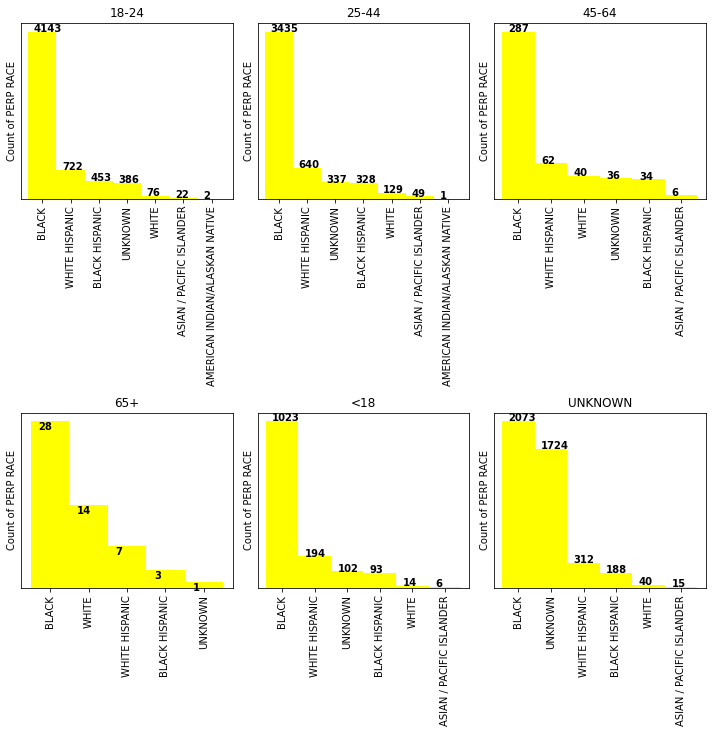

In [ ]:
age_group = shootings.groupby('PERP_AGE_GROUP')['PERP_RACE'].value_counts()
groups = age_group.groupby('PERP_AGE_GROUP')
fig = plt.figure()
count = 1

for year, group in groups:

    ax = fig.add_subplot(6,3,count) 
    ax.set_title(year)
    ax = group[year].plot.bar(figsize = (10,30), width = 1,color='yellow')
    
    count+=1;
    
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('Count of PERP RACE')
    
   
    total_of_year = []
    for i in ax.patches:
        total_of_year.append(i.get_height())
    total = sum(total_of_year)
    for i in ax.patches:
        ax.text(round(i.get_x()+0.2,1),round(i.get_height()-1.5,1),s= round(i.get_height(),1),color="black",fontweight='bold') #adding data labels (total value of spendings ) to the bars
plt.tight_layout()
plt.show()


In [ ]:
victim_df = pd.pivot_table(shootings_age_clean, values = 'INCIDENT_KEY', index = 'VIC_AGE_GROUP', 
               columns = 'VIC_SEX', aggfunc=(lambda x: x.count().round()), margins = True).reindex(['<18', '18-24', '25-44', '45-64', '65+', 'UNKNOWN', 'All'])
victim_df

VIC_SEX,F,M,U,All
VIC_AGE_GROUP,,,,
<18,210.0,1541.0,NaN,1751
18-24,373.0,6274.0,2.0,6649
25-44,476.0,6944.0,2.0,7422
45-64,164.0,897.0,NaN,1061
65+,34.0,73.0,NaN,107
UNKNOWN,4.0,26.0,5.0,35
All,1261.0,15755.0,9.0,17025


In [ ]:
profile_df2 = pd.pivot_table(shootings_age_clean, values = 'INCIDENT_KEY', index = 'VIC_AGE_GROUP', 
               columns = 'VIC_RACE', aggfunc=(lambda x: x.count().round()), margins = True).reindex(['<18', '18-24', '25-44', '45-64', '65+', 'UNKNOWN', 'All'])
profile_df2

VIC_RACE,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,UNKNOWN,WHITE,WHITE HISPANIC,All
VIC_AGE_GROUP,,,,,,,,
<18,2.0,8.0,1331.0,160.0,4.0,18.0,228.0,1751
18-24,4.0,55.0,4984.0,616.0,19.0,82.0,889.0,6649
25-44,2.0,103.0,5421.0,663.0,30.0,213.0,990.0,7422
45-64,NaN,41.0,669.0,103.0,9.0,109.0,130.0,1061
65+,NaN,2.0,53.0,12.0,NaN,24.0,16.0,107
UNKNOWN,NaN,1.0,10.0,3.0,11.0,6.0,4.0,35
All,8.0,210.0,12468.0,1557.0,73.0,452.0,2257.0,17025


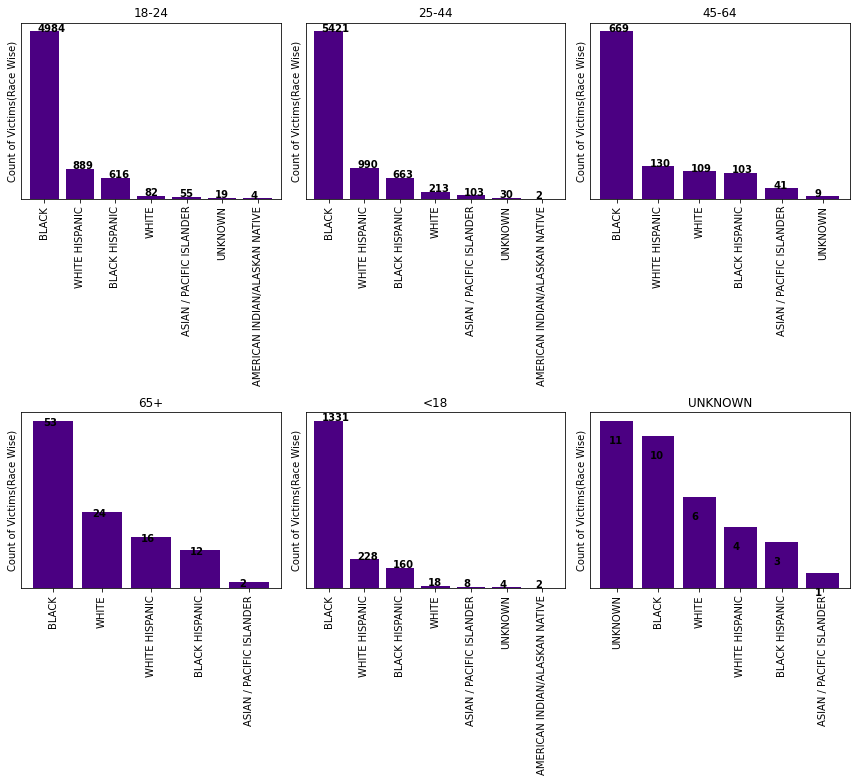

In [ ]:
vic_age = shootings.groupby('VIC_AGE_GROUP')['VIC_RACE'].value_counts()
groups = vic_age.groupby('VIC_AGE_GROUP')
fig = plt.figure()
count = 1
#Creating a for loop to plot different bar plots age wise.
for year, group in groups:
    #Creating subplots to show the output.
    ax = fig.add_subplot(6,3,count)
    ax.set_title(year)
    ax = group[year].plot.bar(figsize = (12,30), width = 0.8,color='indigo')#creating bar plots
    
    count+=1;
    #Defining labels for the axis peresnt in the graph.
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('Count of Victims(Race Wise)')
    
    
    total_of_year = []
    for i in ax.patches:
        total_of_year.append(i.get_height())
    total = sum(total_of_year)
    for i in ax.patches:
        ax.text(round(i.get_x()+0.2,1),round(i.get_height()-1.5,1),s= round(i.get_height(),1),color="black",fontweight='bold') #adding data labels (total value of spendings ) to the bars
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

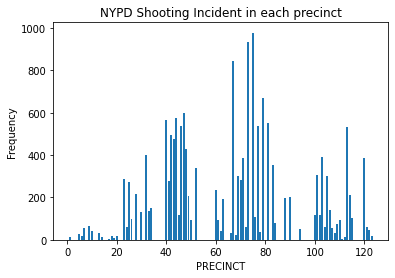

In [ ]:
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))


fig, ax = plt.subplots() 

data = shootings['PRECINCT'].value_counts() 

points = data.index 
frequency = data.values 

ax.bar(points, frequency) 


ax.set_title('NYPD Shooting Incident in each precinct') 
ax.set_xlabel('PRECINCT') 
ax.set_ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



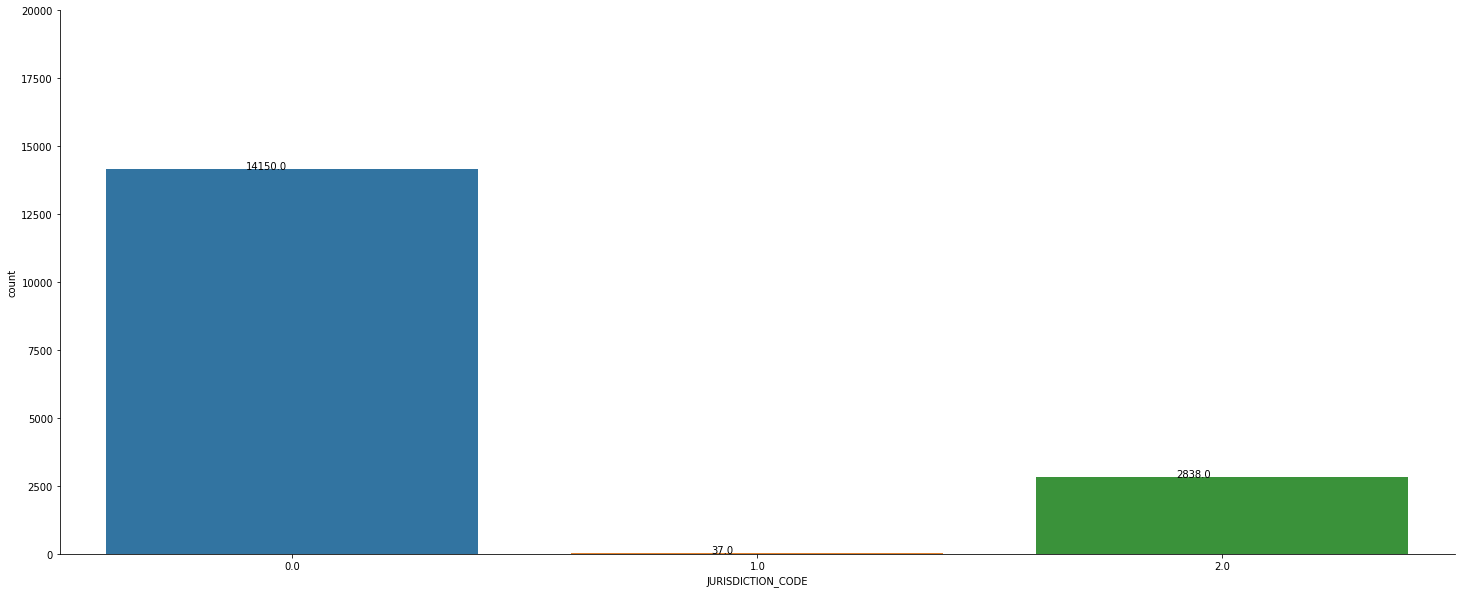

In [ ]:
plt.figure(figsize=(25,10))
plt.ylim(0,20000,20000)
#Creating a countplot for 'JURISDICTION_CODE'. To show the count of distinct values present in the column.
ax = sns.countplot('JURISDICTION_CODE',data=shootings)
annot_plot(ax,0.3,1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



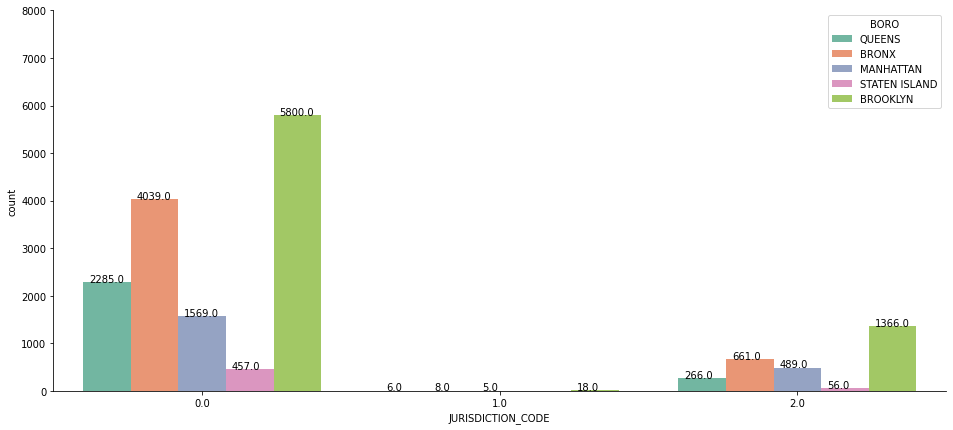

In [ ]:
#Setting the figure size and limits.
plt.figure(figsize=(16,7))
plt.ylim(0,8000,8000)
#Creating a countplot for 'JURISDICTION_CODE' by area. To show the count of distinct values present in the column area wise.
ax = sns.countplot('JURISDICTION_CODE',hue='BORO', data=shootings, palette='Set2')
annot_plot(ax,0.02,1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



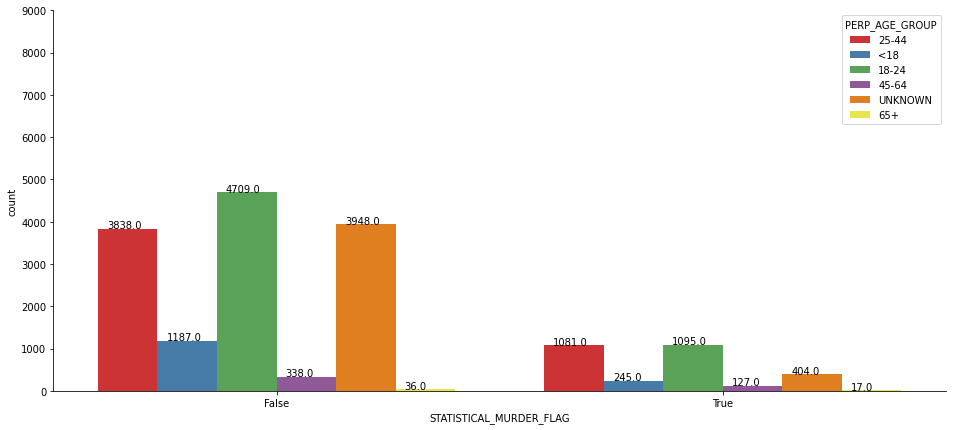

In [ ]:
plt.figure(figsize=(16,7))
plt.ylim(0,9000,9000)

ax = sns.countplot('STATISTICAL_MURDER_FLAG', hue='PERP_AGE_GROUP', data=shootings, palette='Set1')

annot_plot(ax, 0.02, 1)
plt.show()